# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 The music industry is growing exponentially due to access to mushc streaming services like youtube, spotify etc with volume, velocity and variety throughout the globe. This has lead to information overload, and too many choices for the music listener/artists and audiences of the music business.  Recommender Systems are one of the best tools that help recommending products to consumers while they are browsing online. Providing personalized recommendations which is most relevant for the user is what's most likely to keep them engaged and help business.

 Hence providing a recommendation models to provide personalized suggestions to different users has become paramount. This will help music lovers to get access to their chosen songs.

### **The objective:**

 - To help music lovers/audiences get access to their favourite sound track

### **The key questions:**

- (1) Which song will a particular user want to listen based on his/her preferences
- (2) Which users are similar based on the number of times they listen to the song
- (3) Which songs are similar based on their aritist, title and release
- (4) Which songs are similar based on the count of times a particular song is played

### **The problem formulation**:

 We are trying to build a recommendation system for our user base that would enable them to use the music streaming service more often.

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for the Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken to get a feasible solution to the problem. Please note that this is just one way of doing this. **There can be other 'creative' ways to solve the problem, and we encourage you to feel free and explore them as an 'optional' exercise**.

- In the notebook, there are markdown cells called Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. **Please consider the code provided in this notebook as a sample code.**

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

### **Importing Libraries and the Dataset**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [3]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/Music_Recommendation /count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/Music_Recommendation /song_data.csv')

### **Understanding the data by viewing a few observations**

In [4]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [5]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [6]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


**Observation**: There are no NULL values in the count_df dataset
user_id & song_id can take string/float/int data
play_count is an Integer data type

In [7]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


**Observation**: There are no NULL values in the song_df dataset song_id, title, release and artist_name can take string/float/int data year is an Integer data type

#### **Observations and Insights:_____________**


In [5]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously

# Drop the column 'Unnamed: 0'

df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")
df = df.drop(['Unnamed: 0'],axis=1)
df

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [6]:
# Apply label encoding for "user_id" and "song_id"
# Label encoding code
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['user_id'] = le.fit_transform(df['user_id'])

df['song_id'] = le.fit_transform(df['song_id'])


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

In [7]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of songs
ratings_count = dict()

for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [8]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_ratings in ratings_count.items():

    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [9]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary from songs to their number of users
ratings_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1

In [10]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

In [11]:
# Drop records with play_count more than(>) 5
df_final = df_final[df_final['play_count']<=5]

In [12]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,117876.0,37986.496954,22041.887894,11.0,19275.0,37049.0,57152.0,76347.0
song_id,117876.0,4896.602608,2916.276544,21.0,2220.0,5023.0,7522.0,9989.0
play_count,117876.0,1.700058,1.089517,1.0,1.0,1.0,2.0,5.0
year,117876.0,1652.819683,761.726035,0.0,1994.0,2005.0,2008.0,2010.0


In [13]:
# Check the shape of the data
df_final.shape

(117876, 7)

In [14]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


**Observation**: On dropping records where play_count >5. the df_final data set has 117K records

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id: 3155

In [34]:
# Display total number of unique user_id
df_final['user_id'].nunique()

3155

Total number of unique song id: 563

In [18]:
# Display total number of unique song_id
df_final['song_id'].nunique()

563

Total number of unique artists: 232

In [19]:
# Display total number of unique artists
df_final['artist_name'].nunique()

232

#### **Observations and Insights:__________**


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs: Song ID 352 is the most played(interacted) song

In [20]:
df_final.groupby('song_id')['play_count'].sum().sort_values(ascending = False)

song_id
352     1634
2220    1583
8582    1463
5531    1427
4448    1291
        ... 
122      158
1659     157
2501     157
6121     155
2342     146
Name: play_count, Length: 563, dtype: int64

Most interacted users: User ID 3237 has interacted the most with the playlist

In [21]:
df_final.groupby('user_id')['play_count'].sum().sort_values(ascending = False)

user_id
3237     586
15733    479
62759    438
43041    417
27401    409
        ... 
33657      1
14439      1
34194      1
45476      1
76347      1
Name: play_count, Length: 3155, dtype: int64

#### **Observations and Insights:_______**


Songs played in a year

In [22]:
count_songs = df_final.groupby('year').count()['title']

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

count.tail()

,title
year,
2006,7592
2007,13750
2008,14031
2009,16351
2010,4087


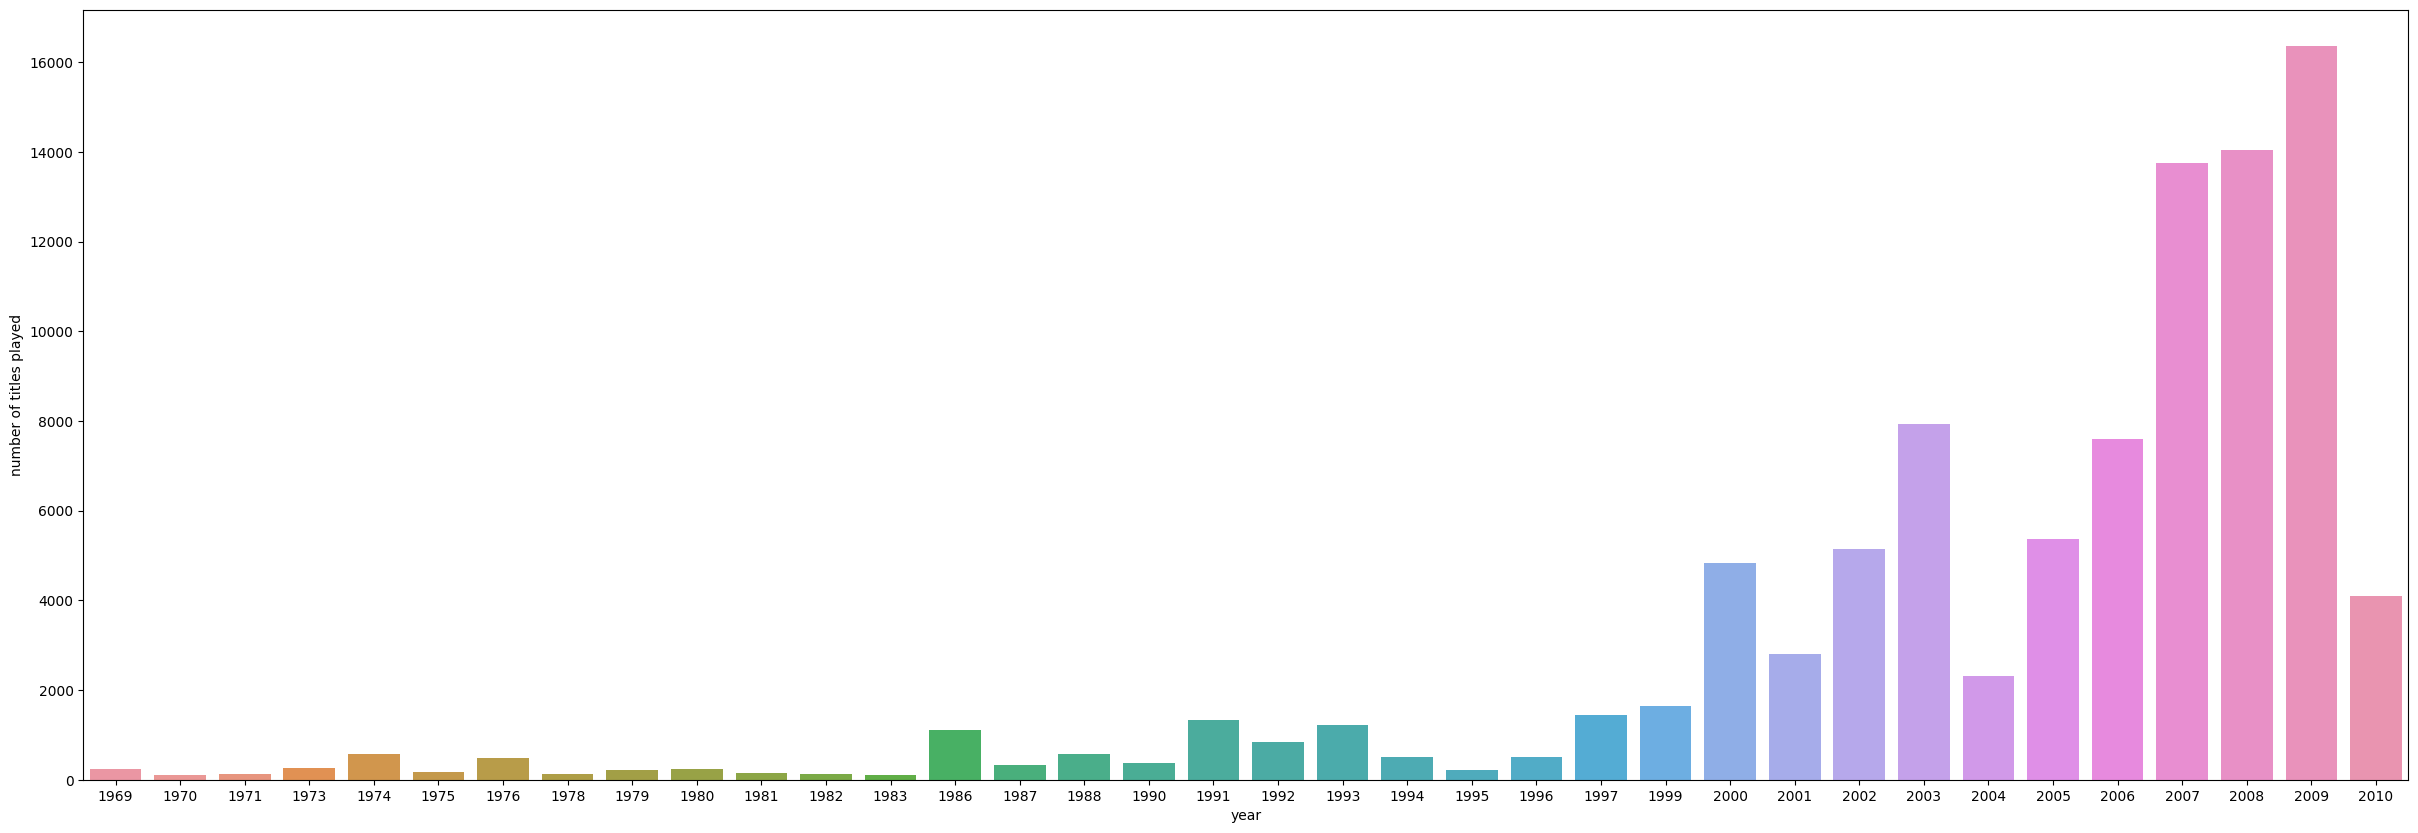

In [23]:
# Create the plot

# Set the figure size
plt.figure(figsize = (30, 10))

sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

# Set the y label of the plot
plt.ylabel('number of titles played')

# Show the plot
plt.show()

**Observation**: The most song was played in the year 2009 followed by 2008 and 2007.

#### **Observations and Insights:__________** #

**Think About It:** What other insights can be drawn using exploratory data analysis?

In [50]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


<Axes: xlabel='year', ylabel='play_count'>

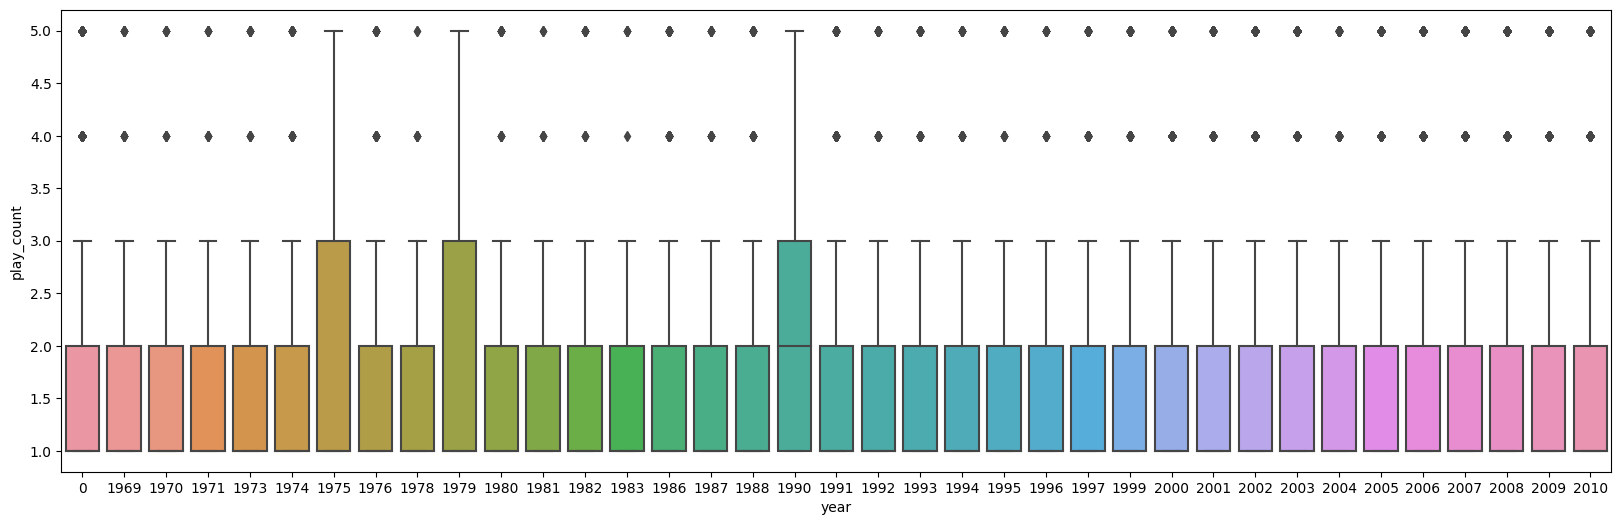

In [68]:
plt.figure(figsize = (20, 6))
sns.boxplot(data = df_final, x = 'year', y = 'play_count')

**Observation**: The year 1975 and 1979 had a median of play_count 3(upper_quartile) and max of 5. Year 1990 had a median of 2

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

(1) The most song was played in the year 2009 followed by 2008 and 2007.

(2) The year 1975 and 1979 had a median of play_count 3(upper_quartile) and max of 5. Year 1990 had a median of 2

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [15]:
# Calculating average play_count
average_count = df_final.groupby('song_id').mean()['play_count']     # Hint: Use groupby function on the song_id column

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id').sum()['play_count']      # Hint: Use groupby function on the song_id column

In [16]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})

# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
21,1.622642,430
22,1.492424,197
52,1.729216,728
62,1.728070,197
93,1.452174,167


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [17]:
# Build the function to find top n songs
def top_n_songs(average_count, n, min_play):

    # Finding songs with minimum number of interactions
    recommendations = final_play[final_play['play_freq'] > min_play]

    # Sorting values with respect to average rating
    recommendations = recommendations.sort_values(by = 'avg_count', ascending = False)

    return recommendations.index[:n]

In [18]:
# Recommend top 10 songs using the function defined above
list(top_n_songs(average_count,10,200))

[7224, 8324, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614]

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [19]:
# Install the surprise package using pip. Uncomment and run the below code to do the same
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163324 sha256=95accd7b749766e9041ddd8b428dbae65f710353dff1e4f7c6db1674fc36bbd8
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [24]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [20]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

In [25]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(0,5)) #use rating scale (0, 5)

# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader) # Take only "user_id","song_id", and "play_count"

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state = 42) # Take test_size = 0.4

**Think About It:** How changing the test size would change the results and outputs?

In [26]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based':True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1) # Use random_state = 1

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user) # Use sim_user_user model

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:**
Intuition of Recall: We are getting a recall of 0.69, which means out of all the products 69% are recommended.
Intuition of Precision: We are getting a precision of 0.39, which means out of all the recommended products 39% are relevant.
Here F_1 score of the baseline model is 0.50. It indicates that mostly recommended products were relevant and relevant products were recommended.

In [27]:
# Predicting play_count for a sample user with a listened song
sim_user_user.predict(6958, 1671, r_ui = 2, verbose = True) # Use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

In [28]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(6958, 3232, verbose = True) # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.64   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6386860897998294, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**
The above output for (user id 6958 and song_id 1671) shows that the actual play_count for this user-song pair is 2 and the predicted play_count is 1.80 by the user-user-similarity-based baseline model. This implies that the model is under-estimating the play_count.
The output for (user_id 6958 and song_id 3232) shows that the predicted play_count is 1.64

Now, let's try to tune the model and see if we can improve the model performance.

In [35]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data) # Use entire data for GridSearch

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.045216793869397
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [36]:
# Train the best model found in above gridsearch
sim_options = {'name': 'cosine',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k = 10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0928
Precision:  0.394
Recall:  0.676
F_1 score:  0.498


**Observations and Insights:**
There was a slight uptick in RMSE. Recall and F_1 score dropped to 0.676 and 0.49 respectively

In [37]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user.predict("6958", "1671", r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='1671', r_ui=2, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [38]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user.predict("6958", "3232",verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='3232', r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:**
The output for (user_id 6958) shows that the predicted play_count is 1.70

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [39]:
# Use inner id 0
sim_user_user.get_neighbors(0, 5)

[3, 6, 11, 16, 28]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [38]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those business ids which the user_id has not visited yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the business ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non visited restaurant ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x : x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

In [41]:
# Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine
recommendations =get_recommendations(df_final, 6958, 5, sim_user_user)

In [42]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_playcounts'])

,song_id,predicted_playcounts
0,7224,3.141147
1,614,2.525000
2,5653,2.514023
3,352,2.425000
4,6450,2.394927


**Observations and Insights:**
For the above top 5 song_id the predicted play counts are betwen 3 & 2

### Correcting the play_counts and Ranking the above songs

In [46]:
def ranking_songs(recommendations, final_play):
  # Sort the songs based on play counts
  ranked_songs = final_play.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id','predicted_playcounts']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_playcounts'] = ranked_songs['predicted_playcounts'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_playcounts', ascending = False)

  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [44]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_playcounts,corrected_playcounts
2,7224,361,3.141147,3.088515
1,614,827,2.525000,2.490227
4,5653,248,2.514023,2.450523
0,352,1634,2.425000,2.400261
3,6450,263,2.394927,2.333265


**Observations and Insights:**
For the above 5 songs - There is slight difference in predicted and corrected playcounts

### Item Item Similarity-based collaborative filtering recommendation systems

In [45]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the testset
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights:**
There was a dip in RMSE, Recall and F_1 score in this model

In [46]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict("6958", "1671", r_ui = 5, verbose = True)

user: 6958       item: 1671       r_ui = 5.00   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='1671', r_ui=5, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [55]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict("47786", "1671", verbose = True)

user: 47786      item: 1671       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='47786', iid='1671', r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:**
The output for (user_id 6958) shows that the predicted play_count is 1.70. For user_id = 47786 the predicted play_count is also 1.70

In [58]:
# Apply grid search for enhancing model performance

param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}
              }

# Performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the model on the data
gs.fit(data)

# Print the best RMSE score
print(gs.best_score['rmse'])

# Print the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0332010004138352
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'cosine', 'user_based': False}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [59]:
# Apply the best modle found in the grid search
sim_options = {'name': 'msd',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k = 10
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0428
Precision:  0.349
Recall:  0.592
F_1 score:  0.439


**Observations and Insights:** On Hyper parameter tunning the Recall and F_1 score improved compared for this model.

In [60]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict("6958", "1671", r_ui = 5, verbose = True)

user: 6958       item: 1671       r_ui = 5.00   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='1671', r_ui=5, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [61]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item_optimized.predict("6958", "3232", verbose = True)


user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='3232', r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:** Hyperparameter tunning did not change the prediction for this model. We observed the same result before tunning.

---



In [62]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k = 5)

[3, 10, 24, 30, 36]

In [65]:
# Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [66]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,9942,2.048219
1,2842,1.949116
2,3050,1.885211
3,4939,1.771190
4,1691,1.743513


In [67]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_playcounts,corrected_playcounts
3,9942,373,2.048219,1.996441
1,2842,396,1.949116,1.898864
2,3050,394,1.885211,1.834831
4,4939,234,1.771190,1.705818
0,1691,402,1.743513,1.693637


**Observations and Insights:** We observed that the playcount has dropped for the above song_ids

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [68]:
# Build baseline model using svd
svd = SVD(random_state = 1)

# Training the algorithm on the train set
svd.fit(trainset)

# Let us compute precision@k and recall@k with k = 10
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [69]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict("6958", "1671", r_ui = 5, verbose = True)


user: 6958       item: 1671       r_ui = 5.00   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='1671', r_ui=5, est=1.6989607635206787, details={'was_impossible': False})

In [70]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict("6958", "3232", verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='3232', r_ui=None, est=1.6989607635206787, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [71]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold gridsearch cross validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the model on the data
gs.fit(data)

# Print the best RMSE score
print(gs.best_score['rmse'])

# Print the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0131625064958023
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [72]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs = 20, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Training the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k = 10
precision_recall_at_k(svd_optimized)

RMSE: 1.0172
Precision:  0.415
Recall:  0.641
F_1 score:  0.504


**Observations and Insights:**
We can see from above that the tuned model is showing a slightly better F_1 score than the baseline model, also the RMSE has gone down. Hence the tuned model is doing better than the earlier model.

In [73]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict("6958", "1671", r_ui = 5, verbose = True)

user: 6958       item: 1671       r_ui = 5.00   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='1671', r_ui=5, est=1.6989607635206787, details={'was_impossible': False})

In [74]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict("6958", "3232", verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='3232', r_ui=None, est=1.6989607635206787, details={'was_impossible': False})

**Observations and Insights:**Matrix factorization did not change the prediction for this model.

In [76]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [77]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_playcounts,corrected_playcounts
1,7224,361,2.733784,2.681152
4,5653,248,2.130383,2.066883
3,8324,252,2.100425,2.037431
0,614,827,1.991622,1.956848
2,6450,263,2.001452,1.939790


**Observations and Insights:** We observed that the corrected_playcount values are less compared to predicted_playcounts

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [29]:
# Make baseline clustering model
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k and recall@k with k = 10
precision_recall_at_k(clust_baseline)


RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [30]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 5, verbose = True)

user: 6958       item: 1671       r_ui = 5.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=5, est=1.2941824757363074, details={'was_impossible': False})

In [31]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [32]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-fold gridsearch cross validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Print the best RMSE score
print(gs.best_score['rmse'])

# Print the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0635490884954713
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 20}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [33]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 3,n_cltr_i = 3, n_epochs = 40, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k and recall@k with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


**Observations and Insights:** There was no change in the scores on hyper paramter tuning

In [36]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 5, verbose = True)

user: 6958       item: 1671       r_ui = 5.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=5, est=1.2941824757363074, details={'was_impossible': False})

In [35]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

**Observations and Insights:**
For User 6958 the actual playcount is 5 but the model predicted is 1.29
and for item 3232 the model predicted 1.48

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [42]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)
clustering_recommendations

[(7224, 3.0947973198294125),
 (8324, 2.3114984930523246),
 (9942, 2.2150393965932285),
 (5531, 2.1245632061170374),
 (4831, 2.1237828270757895)]

### Correcting the play_count and Ranking the above songs

In [47]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, final_play)

,song_id,play_freq,predicted_playcounts,corrected_playcounts
2,7224,361,3.094797,3.042166
3,8324,252,2.311498,2.248504
1,9942,373,2.215039,2.163261
0,5531,1427,2.124563,2.098091
4,4831,214,2.123783,2.055424


**Observations and Insights:** The predicted and corrected playcounts are closer to each other for the top 5 song_ids

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [48]:
df_small = df_final

In [50]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] + df_small['release'] + df_small['artist_name']

In [56]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small_new = df_small[['user_id', 'song_id','play_count', 'title', 'text']]
# df_small_new.head()
# Drop the duplicates from the title column
df_small_new = df_small_new.drop_duplicates('title')
df_small_new
# Set the title column as the index
df_small_new = df_small_new.set_index('title')
df_small_new


,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And PrudenceDistillationErin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael ValentineSawdustThe Killers
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album)Vampire WeekendVampir...
They Might Follow You,6958,703,1,They Might Follow YouTiny VipersTiny Vipers
Monkey Man,6958,719,1,Monkey ManYou Know I'm No GoodAmy Winehouse
...,...,...,...,...
Tuesday Moon,74930,2786,1,Tuesday MoonEverything IsNeutral Milk Hotel
Everything In Its Right Place,24706,229,1,Everything In Its Right PlaceThe Best OfRadiohead
The Last Song,40245,2161,1,The Last SongThe All-American RejectsThe All-A...


In [57]:
# See the first 5 records of the df_small dataset
df_small_new.head(5)

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And PrudenceDistillationErin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael ValentineSawdustThe Killers
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album)Vampire WeekendVampir...
They Might Follow You,6958,703,1,They Might Follow YouTiny VipersTiny Vipers
Monkey Man,6958,719,1,Monkey ManYou Know I'm No GoodAmy Winehouse


In [58]:
# Create the series of indices from the data
indices = pd.Series(df_small_new.index)

indices[ : 5]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

In [59]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [64]:
# Function to tokenize the text
def tokenize(text):

    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    tokens = word_tokenize(text)

    words = [word for word in tokens if word not in stopwords.words("english")]  # Use stopwords of english

    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [67]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
play_tfidf = tfidf.fit_transform(df_small_new['text'].values).toarray()

In [68]:
# Compute the cosine similarity for the tfidf above output
similar_play = cosine_similarity(play_tfidf, play_tfidf)
similar_play

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [78]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small_new.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [79]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations("Learn To Fly", similar_play)

[345, 423, 234, 509, 374, 370, 371, 372, 373, 376]


['From Left To Right',
 'Nothing Better (Album)',
 'The Pretender',
 'Everlong',
 'Who Let You Go?',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 "Sam's Town"]

**Observations and Insights:**
These are the top 10 songs recommended which are similar to Learn to FLy

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
  
  
  We performed various models on our song data set like user-user, song-song similarity based, collaborative based, svd recommendation system.We observed that user-user has the best Recall score of 0.69 compared to other models. Also for svd_optimzed we saw the precision was higher 0.415.
  
  There would be no scope of improvement as we performed hyper parameter tuning to these models and observed that the scores did not change much.

  However having said that we could use other paramters during hyper parameter tunning that may impact the outcome which would result in better performance

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

For performance evaluation of these models precision  and recall  are introduced in this case study. Using these two metrics F_1 score is calculated for each working model.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

The User-User based recommendation system is the best model as it has the bext recall socre of 0.69 compared to the other models.